In [ ]:
!pip install -q modelbit

# Restart your Kernel after installing modelbit

In [ ]:
import modelbit
mb = modelbit.login()

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/moezali1/modelbit/main/loans.csv')

In [ ]:
data.head()

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


# Exploratory Data Analysis

In [ ]:
data.isnull().sum()

Applicant_ID             0
Age                      0
Annual_Income            0
Credit_Score             0
Employment_Years         0
Loan_Amount_Requested    0
Default                  0
dtype: int64

<Axes: xlabel='Default'>

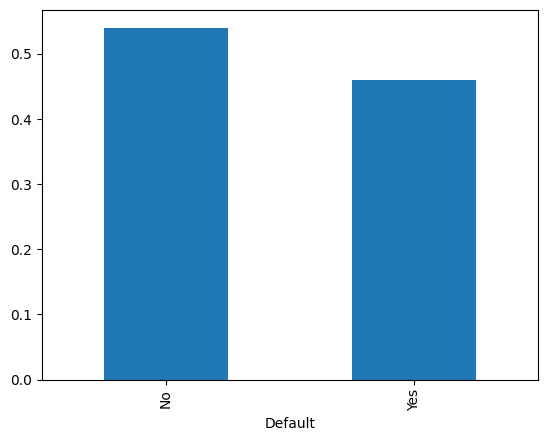

In [ ]:
data['Default'].value_counts(normalize=True).plot.bar()

<Axes: >

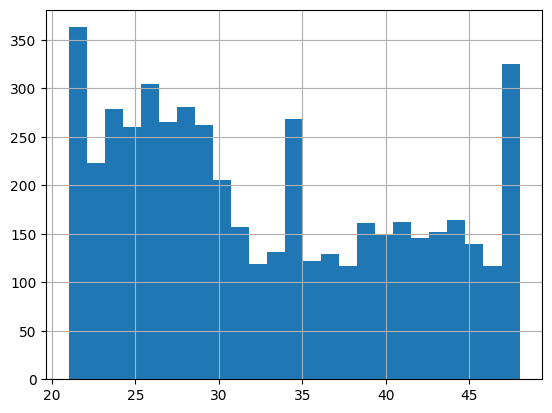

In [ ]:
data['Age'].hist(bins=25)

<Axes: >

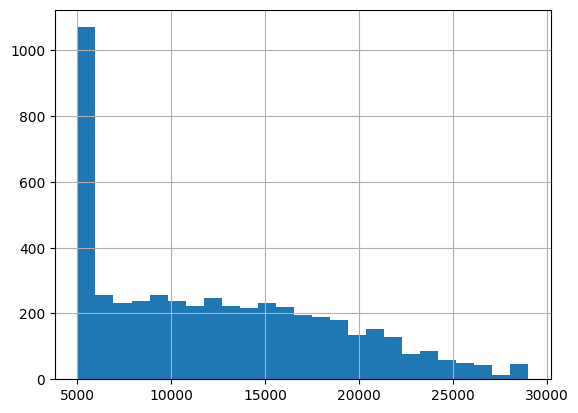

In [ ]:
data['Loan_Amount_Requested'].hist(bins=25)

# Model/Pipeline Training and Selection

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# Features and target variable
X = data.drop(columns=['Default', 'Applicant_ID'])
y = data['Default']

# Columns to be scaled
numeric_features = ['Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']

# Column to be binned and one-hot encoded
categorical_features = ['Age']

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('bin', KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3500, 5)
X_test: (1500, 5)
y_train: (3500,)
y_test: (1500,)


In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Annual_Income',
                                                   'Credit_Score',
                                                   'Employment_Years',
                                                   'Loan_Amount_Requested']),
                                                 ('cat',
                                                  Pipeline(steps=[('bin',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=6)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)
y_pred

array(['No', 'Yes', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [ ]:
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
y_pred_prob

array([6.69689426e-05, 9.02806812e-01, 9.96185218e-01, ...,
       2.41424602e-02, 8.03381646e-01, 9.78944885e-01])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9606666666666667

# Deployment Modelbit

In [ ]:
import pandas as pd
import numpy as np

# first define function
def predict_loan_default_dip(Age: int, Annual_Income: float, Credit_Score: int, Employment_Years: float, Loan_Amount_Requested: float)-> float:

  """
  Predict the probability of loan default using a pre-trained machine learning pipeline.

  Args:
      Age (int): Applicant's age.
      Annual_Income (float): Applicant's annual income.
      Credit_Score (int): Applicant's credit score.
      Employment_Years (float): Number of years employed.
      Loan_Amount_Requested (float): Requested loan amount.

  Returns:
      float: Probability of loan default.
  """

  return pipeline.predict_proba(pd.DataFrame([[Age, Annual_Income, Credit_Score, Employment_Years, Loan_Amount_Requested]],
                                             columns = ['Age', 'Annual_Income', 'Credit_Score', 'Employment_Years', 'Loan_Amount_Requested']))[:,1]

In [ ]:
data.head(5)

,Applicant_ID,Age,Annual_Income,Credit_Score,Employment_Years,Loan_Amount_Requested,Default
0,10,32,82133,689,1,10789,No
1,38,30,53172,588,3,5442,Yes
2,6,31,90000,573,4,5000,Yes
3,15,29,74634,621,7,16074,Yes
4,35,36,78232,701,5,17742,No


In [ ]:
predict_loan_default_dip(32, 821233, 689, 1, 10789)

array([4.28870351e-27])

In [ ]:
mb.deploy(predict_loan_default_dip)

Uploading 'pipeline': 100%|██████████| 1.89k/1.89k [00:00<00:00, 3.84kB/s]


# Call REST API Modelbit

## Prediction: No Default

In [ ]:
!curl -X POST "https://dipankarporey.app.modelbit.com/v1/predict_loan_default_dip/latest" -d "{\"data\": [32, 821233, 689, 1, 10789]}"

{"data":[4.288703514360477e-27]}

In [ ]:
!curl -X POST "https://dipankarporey.app.modelbit.com/v1/predict_loan_default_dip/latest" -d "{\"data\": [32, 821233, 689, 1, 10789]}" | json_pp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    69  100    32  100    37     97    112 --:--:-- --:--:-- --:--:--   211
{
   "data" : [
      4.28870351436048e-27
   ]
}


In [ ]:
!curl -s -XPOST "https://dipankarporey.app.modelbit.com/v1/predict_loan_default_dip/latest" -d '{"data": [32, 821233, 689, 1, 10789]}' | json_pp

{
   "data" : [
      4.28870351436048e-27
   ]
}


In [ ]:
# !curl -s -XPOST "https://urmitmahida.app.modelbit.com/v1/predict_loan_default/latest" -d '{"data": [32, 821233, 689, 1, 10789]}' | json_pp

In [ ]:
import requests
import json

url = "https://dipankarporey.app.modelbit.com/v1/predict_loan_default_dip/latest"
headers = {
    'Content-Type': 'application/json'
}
data = {
    "data": [32, 821233, 689, 1, 10789]
}

response = requests.post(url, headers = headers, json = data)
response_json = response.json()

print(json.dumps(response_json, indent=4))

{
    "data": [
        4.288703514360477e-27
    ]
}


In [ ]:
import requests
import json

url = "https://urmitmahida.app.modelbit.com/v1/predict_loan_default/latest"
headers = {
    'Content-Type': 'application/json'
}
data = {
    "data": [32, 821233, 689, 1, 11789]
}

response = requests.post(url, headers = headers, json = data)
response_json = response.json()

print(json.dumps(response_json, indent=4))

{
    "data": [
        3.584332710555899e-27
    ]
}


In [ ]:
print(response_json)

{'data': [3.584332710555899e-27]}


In [ ]:
def APICheck(url, data):

  headers = {
      'Content-Type': 'application/json'
  }
  data = {
      "data": data
  }

  response = requests.post(url, headers = headers, json = data)
  response_json = response.json()

  return [{"response" : response_json['data'][0]}]


In [ ]:
url = "https://urmitmahida.app.modelbit.com/v1/predict_loan_default/latest"
data = [32, 821233, 689, 1, 11789]

APICheck(url, data)

[{'response': 3.584332710555899e-27}]